ST 2195 Q1

# When is the best time of day, day of the week, and time of year to minimise delays?

## Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
df2006 = pd.read_csv('2006.csv')

In [3]:
df2007 = pd.read_csv('2007.csv')

## Data Wrangling

We will reduce the columns of the df2006, df2007 data as there are many columnns. For this question, we will only need six columns ('Year', 'Month', 'DayofMonth', 'DayOfweek', 'DepTime', 'ArrDelay'). df1 = df[['col1','col2]]. df1 is the name after we have reduced the column from df. We will use ArrDelay for the analysis for this question. 

In [4]:
df2006_subtable = df2006[['Year','Month','DayofMonth','DayOfWeek','DepTime','ArrDelay']]

In [5]:
df2007_subtable = df2007[['Year','Month','DayofMonth','DayOfWeek','DepTime','ArrDelay']]

We remove rows with Na values in the data. The code used: 'df.dropna()'. When we use '.head' it is to view the table as shown below.

In [6]:
df2006_subtable_no_na = df2006_subtable.dropna()
df2006_subtable_no_na.head(7141922)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay
0,2006,1,11,3,743.0,6.0
1,2006,1,11,3,1053.0,-5.0
2,2006,1,11,3,1915.0,-23.0
3,2006,1,11,3,1753.0,-8.0
4,2006,1,11,3,824.0,0.0
...,...,...,...,...,...,...
7141917,2006,12,29,5,1246.0,-7.0
7141918,2006,12,29,5,1225.0,62.0
7141919,2006,12,29,5,2118.0,13.0
7141920,2006,12,29,5,2122.0,-14.0


In [7]:
df2007_subtable_no_na = df2007_subtable.dropna()
df2007_subtable_no_na.head(7453215)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay
0,2007,1,1,1,1232.0,1.0
1,2007,1,1,1,1918.0,8.0
2,2007,1,1,1,2206.0,34.0
3,2007,1,1,1,1230.0,26.0
4,2007,1,1,1,831.0,-3.0
...,...,...,...,...,...,...
7453210,2007,12,15,6,1558.0,13.0
7453211,2007,12,15,6,1902.0,5.0
7453212,2007,12,15,6,1024.0,15.0
7453213,2007,12,15,6,1353.0,36.0


Next we merge the two years of data into one. 

In [8]:
df_combined_no_na = pd.concat([df2006_subtable_no_na,df2007_subtable_no_na])

## Day Of Week

We now find the average delay for each day. After finding the average delay we will plot the bar graph. These steps will be repeated again for time of year.

In [9]:
dfcombined_avgDay = df_combined_no_na.pivot_table(values = 'ArrDelay', index = ['DayOfWeek'])

In [10]:
dfcombined_avgDay

,ArrDelay
DayOfWeek,
1,9.701637
2,7.248411
3,8.987954
4,12.141524
5,12.701676
6,5.513355
7,9.247222


Text(0, 0.5, 'Avg Arr Delay ')

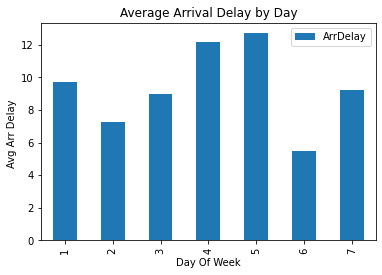

In [11]:
dfcombined_avgDay.plot(kind="bar")
plot.title("Average Arrival Delay by Day")
plot.xlabel("Day Of Week")
plot.ylabel("Avg Arr Delay ")

## Time of Year

In [12]:
dfcombined_avgmonth = df_combined_no_na.pivot_table(values = 'ArrDelay', index = ['Month'])

In [13]:
dfcombined_avgmonth

,ArrDelay
Month,
1,7.447226
2,10.498526
3,9.027283
4,7.491780
5,6.964305
6,14.153010
7,12.736940
8,10.662703
9,6.034441


Text(0, 0.5, 'Avg Arr Delay ')

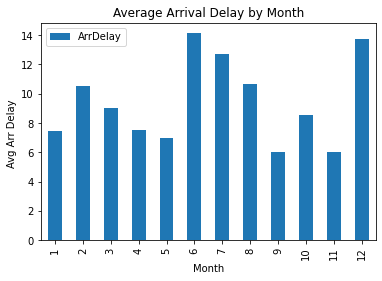

In [14]:
dfcombined_avgmonth.plot(kind="bar")
plot.title("Average Arrival Delay by Month")
plot.xlabel("Month")
plot.ylabel("Avg Arr Delay ")

## Time of Day

For time of day we do the similar steps as we did above. We have one extra step. we else if function to slpit the departure time into different time of day. 600-1159 is morning, 1200-1759 is afternoon, 1800-2359 is night, 000-559 is early morning. Else if function can be done by using < or > to range the values to assign the time of day. However I used in range instead as it easier to use. The first value (value before the comma) in the brackets is an inclusive value. While the second value is non-inclusive. After which we can do as we have done in the previous parts. for this part we will not use Diverted and Cancelled flights as the flights might be divertd or cancelled in diffrent time of day.  

In [15]:
dfcombined_time = []
for row in df_combined_no_na['DepTime']:
    if row in range (600,1200) : dfcombined_time.append('Morning')
    elif row in range (1200,1800) : dfcombined_time.append('Afternoon')
    elif row in range (1800,2400): dfcombined_time.append('Night')
    else : dfcombined_time.append('Early Morning')


In [16]:
df_combined_no_na['dfcombined_time'] = dfcombined_time 


In [17]:
df_combined_no_na

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrDelay,dfcombined_time
0,2006,1,11,3,743.0,6.0,Morning
1,2006,1,11,3,1053.0,-5.0,Morning
2,2006,1,11,3,1915.0,-23.0,Night
3,2006,1,11,3,1753.0,-8.0,Afternoon
4,2006,1,11,3,824.0,0.0,Morning
...,...,...,...,...,...,...,...
7453210,2007,12,15,6,1558.0,13.0,Afternoon
7453211,2007,12,15,6,1902.0,5.0,Night
7453212,2007,12,15,6,1024.0,15.0,Morning
7453213,2007,12,15,6,1353.0,36.0,Afternoon


In [18]:
dfcombined_avgtime = df_combined_no_na.pivot_table(values = 'ArrDelay', index = ['dfcombined_time'])

In [19]:
dfcombined_avgtime

,ArrDelay
dfcombined_time,
Afternoon,9.997069
Early Morning,10.878248
Morning,1.822631
Night,21.641754


Text(0, 0.5, 'Avg Arr Delay ')

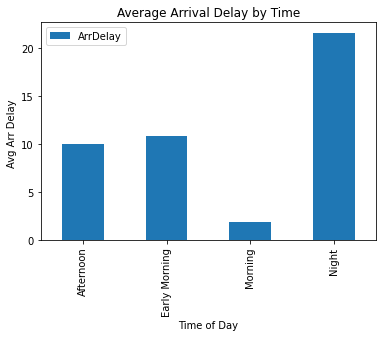

In [20]:
dfcombined_avgtime.plot(kind="bar")
plot.title("Average Arrival Delay by Time")
plot.xlabel("Time of Day")
plot.ylabel("Avg Arr Delay ")
